In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
data = pandas.read_csv('MEU-Mobile.csv')

cols_Hold = ['Hold .', 'Hold t', 'Hold i', 'Hold e', 'Hold Shift', 'Hold 5', 'Hold Shift.1', 'Hold Caps', 'Hold r', 'Hold o', 'Hold a', 'Hold n', 'Hold l', 'Hold Enter']
data['Std H'] = np.std(data[cols_Hold], axis=1)
cols_Pressure = ['Pressure .', 'Pressure t', 'Pressure i', 'Pressure e', 'Pressure Shift', 'Pressure 5', 'Pressure Shift.1', 'Pressure Caps', 'Pressure r', 'Pressure o', 'Pressure a', 'Pressure n', 'Pressure l', 'Pressure Enter']
data['Std P'] = np.std(data[cols_Pressure], axis=1)
cols_Area = ['Size .', 'Size t', 'Size i', 'Size e', 'Size Shift', 'Size 5', 'Size Shift.1', 'Size Caps', 'Size r', 'Size o', 'Size a', 'Size n', 'Size l', 'Size Enter']
data['Std A'] = np.std(data[cols_Area], axis=1)

In [3]:
cols_to_drop = list(data)[28:28+13]

In [4]:
X1 = data.drop(cols_to_drop, axis=1, inplace=False)

## Feature selection
# PCA

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)

X = X1.drop('Subject', axis=1, inplace=False)
Y = X1['Subject'].values
X = data.drop('Subject', axis=1, inplace=False)
X = X.values

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_reduced = pca.fit_transform(X_norm)

print((pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1], pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]))

(0.2055443775118517, 0.0989309168062587, 0.3044752943181104)


Projecting 74-dimensional data to 2D


Text(0.5, 1.0, 'Projection of data about different users onto the plane')

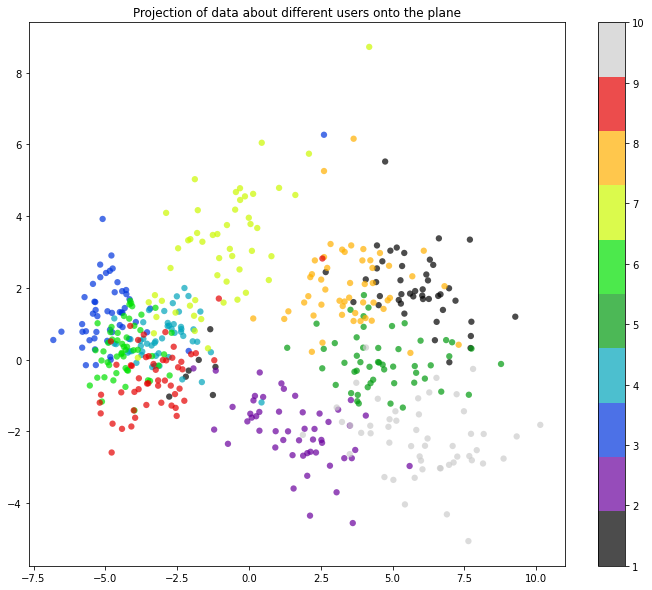

In [7]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:51 * 10, 0], X_reduced[:51 * 10, 1], c=Y[:51 * 10], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Projection of data about different users onto the plane')

/Users/aliabduljabbar/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aliabduljabbar/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'MNIST. t-SNE projection')

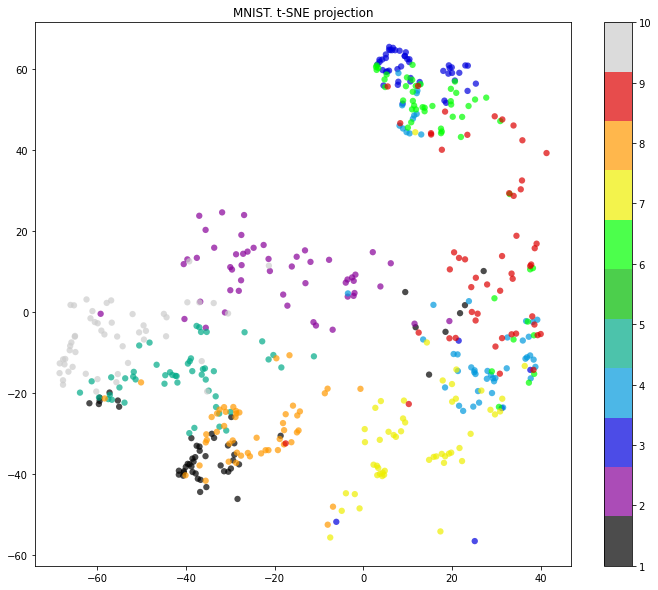

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X_reduced)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:510, 0], X_tsne[:510, 1], c=Y[:510], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 11))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# One-class SVM


Gamma: 0.011
OUT-mean 0.15023682200152788
OUT-std 0.12899254502109195
TEST-mean 0.14123376623376624
TEST-std 0.12016277190712371

Gamma: 0.012
OUT-mean 0.13633307868601985
OUT-std 0.12868837888733167
TEST-mean 0.15876623376623378
TEST-std 0.12208785190342089

Gamma: 0.013
OUT-mean 0.12284823020117137
OUT-std 0.11192656339591472
TEST-mean 0.1775974025974026
TEST-std 0.1340051925648394

Gamma: 0.014
OUT-mean 0.10652151769798829
OUT-std 0.1059121647417445
TEST-mean 0.19155844155844157
TEST-std 0.14237670096935517

Gamma: 0.015
OUT-mean 0.08979246243952126
OUT-std 0.09660183925561819
TEST-mean 0.21818181818181817
TEST-std 0.13029799647983384

Gamma: 0.016
OUT-mean 0.07077667430608607
OUT-std 0.07760267744484212
TEST-mean 0.2616883116883117
TEST-std 0.14857364225033243
40


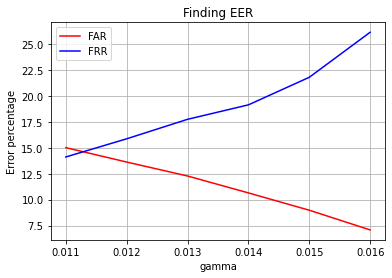

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

X = data.drop('Subject', axis=1, inplace=False)
X = X.values

from sklearn.svm import OneClassSVM

good_train_size = 40
num_users = 56
num_shuf = 5
plot_out = []
plot_test = []

x = np.arange(0.011, 0.016, 0.001)
for metr in ['cityblock']:
    for gam in x:
        print()
        print('Gamma:', round(gam, 4))
        for thres in [1]:
            errors_out = []
            errors_test = []
            for user in range(num_users):
                for shuf in range(num_shuf):
                    X_good = X[user * 51:(user + 1) * 51]
                    scaler = StandardScaler()                    
                    pca = PCA(n_components=40)
                    np.random.shuffle(X_good)

                    X_train_old = scaler.fit_transform(X_good[:good_train_size])
                    X_test_old = scaler.transform(X_good[good_train_size:])
                    X_out_old = scaler.transform(np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0))
                    np.random.shuffle(X_out_old)
                    
                    X_train = pca.fit_transform(X_train_old)
                    X_test = pca.transform(X_test_old)
                    X_out = pca.transform(X_out_old)

                    clf = OneClassSVM(kernel='rbf', nu=0.5, gamma=gam)
                    clf.fit(X_train)
                    
                    y_pred_test = clf._decision_function(X_test)
                    y_pred_out = clf._decision_function(X_out)
                    threshold = np.percentile(clf._decision_function(X_train), thres)

                    err_test = y_pred_test[y_pred_test < threshold].size
                    errors_test.append(err_test)

                    err_out = y_pred_out[y_pred_out >= threshold].size
                    errors_out.append(err_out)

            print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
            plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
            print("OUT-std", np.std(errors_out) / X_out.shape[0])

            print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
            plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
            print("TEST-std", np.std(errors_test) / X_test.shape[0])
            
print(pca.n_components_)

plt.title('Finding EER')
plt.plot(x, plot_out, color='r', label='FAR')
plt.plot(x, plot_test, 'b', label='FRR')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Error percentage')
plt.grid()
plt.show()

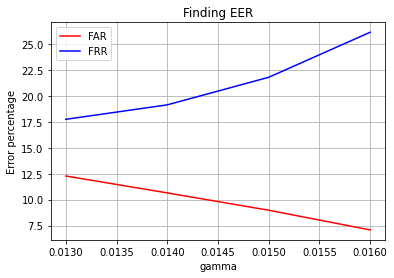

In [10]:
plt.title('Finding EER')
plt.plot(x[2:], plot_out[2:], color='r', label='FAR')
plt.plot(x[2:], plot_test[2:], 'b', label='FRR')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Error percentage')
plt.grid()
plt.show()

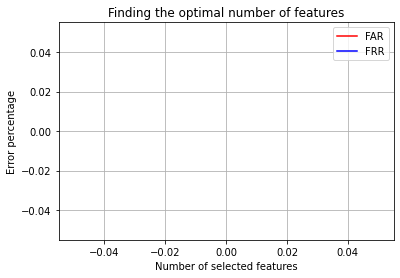

In [11]:
plt.title('Finding the optimal number of features')
plt.plot(x[10:], plot_out[10:], color='r', label='FAR')
plt.plot(x[10:], plot_test[10:], 'b', label='FRR')

plt.legend()
plt.xlabel('Number of selected features')
plt.ylabel('Error percentage')
plt.grid()
plt.show()